# Question 2 Solution: Predicting Cognitive Performance from EEG Data

In this exercise, we will develop and evaluate a multiple linear regression model that predicts cognitive performance scores (ranging from 0 to 100) using various EEG features recorded during a cognitive task.
The provided dataset includes the following key variables: **theta** which represents the power in the theta frequency band (4-8 Hz), **alpha**  the power in the alpha band (8-12 Hz), **beta** the power in the beta band (12-30 Hz), **gamma** the power in the gamma band (30-50 Hz), and **performance** the dependent variable representing the cognitive performance score.

Our approach will be structured as follows:

1. **Model Development:** We will construct and fit a multiple linear regression model to predict cognitive performance scores using the given EEG features as predictors.
2. **Model Evaluation:** We will assess the model's predictive accuracy using the coefficient of determination, $R^{2}$,to understand how well the EEG features explain the variance in cognitive performance.
3. **Multicollinearity Analysis:** We will compute the Variance Inflation Factor (VIF) for each predictor to check for multicollinearity. We will interpret these VIF values and discuss how multicollinearity might impact the model’s reliability and the interpretability of individual feature coefficients.

By completing this exercise, we will gain deeper insights into building and evaluating a multiple linear regression model, understanding key performance metrics like $R^{2}$, and recognizing the implications of multicollinearity using VIF values on the model's predictive strength and robustness.


In [110]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt

We are using pandas to create the dataset based on the problem statement.

In [112]:
np.random.seed(0)  # For reproducibility
data = {
    'Theta': [0.5, 0.6, 0.4, 0.3, 0.7, 0.8, 0.2, 0.9, 0.1, 0.6],
    'Alpha': [1.2, 1.5, 1.1, 1.0, 1.4, 1.3, 0.9, 1.6, 0.8, 1.7],
    'Beta': [0.3, 0.4, 0.3, 0.2, 0.5, 0.4, 0.1, 0.6, 0.2, 0.5],
    'Gamma': [0.7, 0.9, 0.6, 0.5, 1.0, 0.8, 0.4, 1.1, 0.3, 0.9],
    'Performance': [75, 80, 65, 70, 85, 78, 60, 90, 55, 82]  # Base performance scores
}

# Adding significant random noise to the performance scores, you can play with the noise variables (mean and std) to see how it effects the model (TODO)
noise = np.random.normal(0, 10, size=10)  # Mean 0, standard deviation 10
data['Performance'] = data['Performance'] + noise

# Convert to a pandas DataFrame
df = pd.DataFrame(data)


## Q2.1: Fit the Multiple Linear Regression Model

In [113]:
# Define independent variables (features) and dependent variable (target)
X = df[['Theta', 'Alpha', 'Beta', 'Gamma']]
y = df['Performance']

# Add constant term for intercept
# X = sm.add_constant(X)

# Fitting the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Getting the coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 53.874397047827074
Coefficients: [-66.77386136 -28.5351442  -89.53875868 178.56666631]


**Note:** The intercept is the value when all features are zero. The coefficients represent the change in the performance score for a one-unit increase in each EEG feature.


## Q2.2: Calculate the Coefficient of Determination $R^2$

In [114]:
# Predicting the performance scores
y_pred = model.predict(X)

# Calculating R^2
r2 = r2_score(y, y_pred)
print("R^2:", r2)


R^2: 0.691030173934144


## Q2.3: Check for Multicollinearity Using VIF

In [115]:
# Adding a constant to the features matrix for VIF calculation
X_with_const = sm.add_constant(X)

# Calculating VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i+1) for i in range(len(X.columns))]

print(vif)


  Feature        VIF
0   Theta  10.392401
1   Alpha   9.846803
2    Beta  11.346477
3   Gamma  27.602345


## Q4.3: Bootstrapping for Confidence Interval

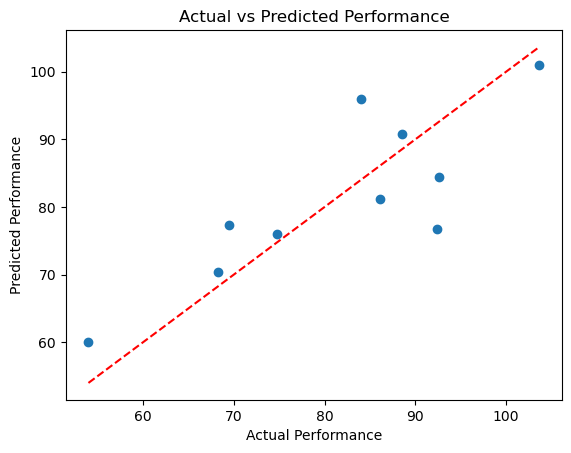

In [116]:
# Step 8: Plotting the actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.title('Actual vs Predicted Performance')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Reference line

# plt.xlim(60, 90)
# plt.ylim(60, 90)
plt.show()

The intercept and coefficients provide insights into how each EEG feature impacts the cognitive performance score.
The R² value indicates the extent to which the model explains the variability of the response data, showing the model's overall fit.
Lastly, the VIF (Variance Inflation Factor) helps detect if any independent variable is highly collinear with others, which is crucial for understanding the reliability of the regression coefficients.